### EDA ANALYSIS FOR HEART-DISEASE-PREDICTION

In [359]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df=pd.read_csv('heart_disease_dataset.csv',encoding='latin-1')

In [4]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [5]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [6]:
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [7]:
df['Alcohol Intake'].value_counts()

Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64

```
1. In the Alcohol Intake feature, the number of entries with missing values (null, 340 records) is **nearly equal** to the actual categories such as Heavy (346) and Moderate (314).  
2. Hence, the null values can't be dropped or replaced (like replaing them with their mode -> mode imputation) outright without analysing them with other features.
```

In [8]:
updated_df = df.fillna(df['Alcohol Intake'].mean())

TypeError: can only concatenate str (not "int") to str

#### Error Analysis: Mean/Median imputation won't work for Categorical Values

In [13]:
updated_df = df.copy()
updated_df['Alcohol Intake'] = updated_df['Alcohol Intake'].fillna('Unknown') #Filled NaN with Unknown values

In [14]:
df.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [15]:
updated_df.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Unknown,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Unknown,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Unknown,6,No,Yes,No,2,183,Yes,Asymptomatic,0


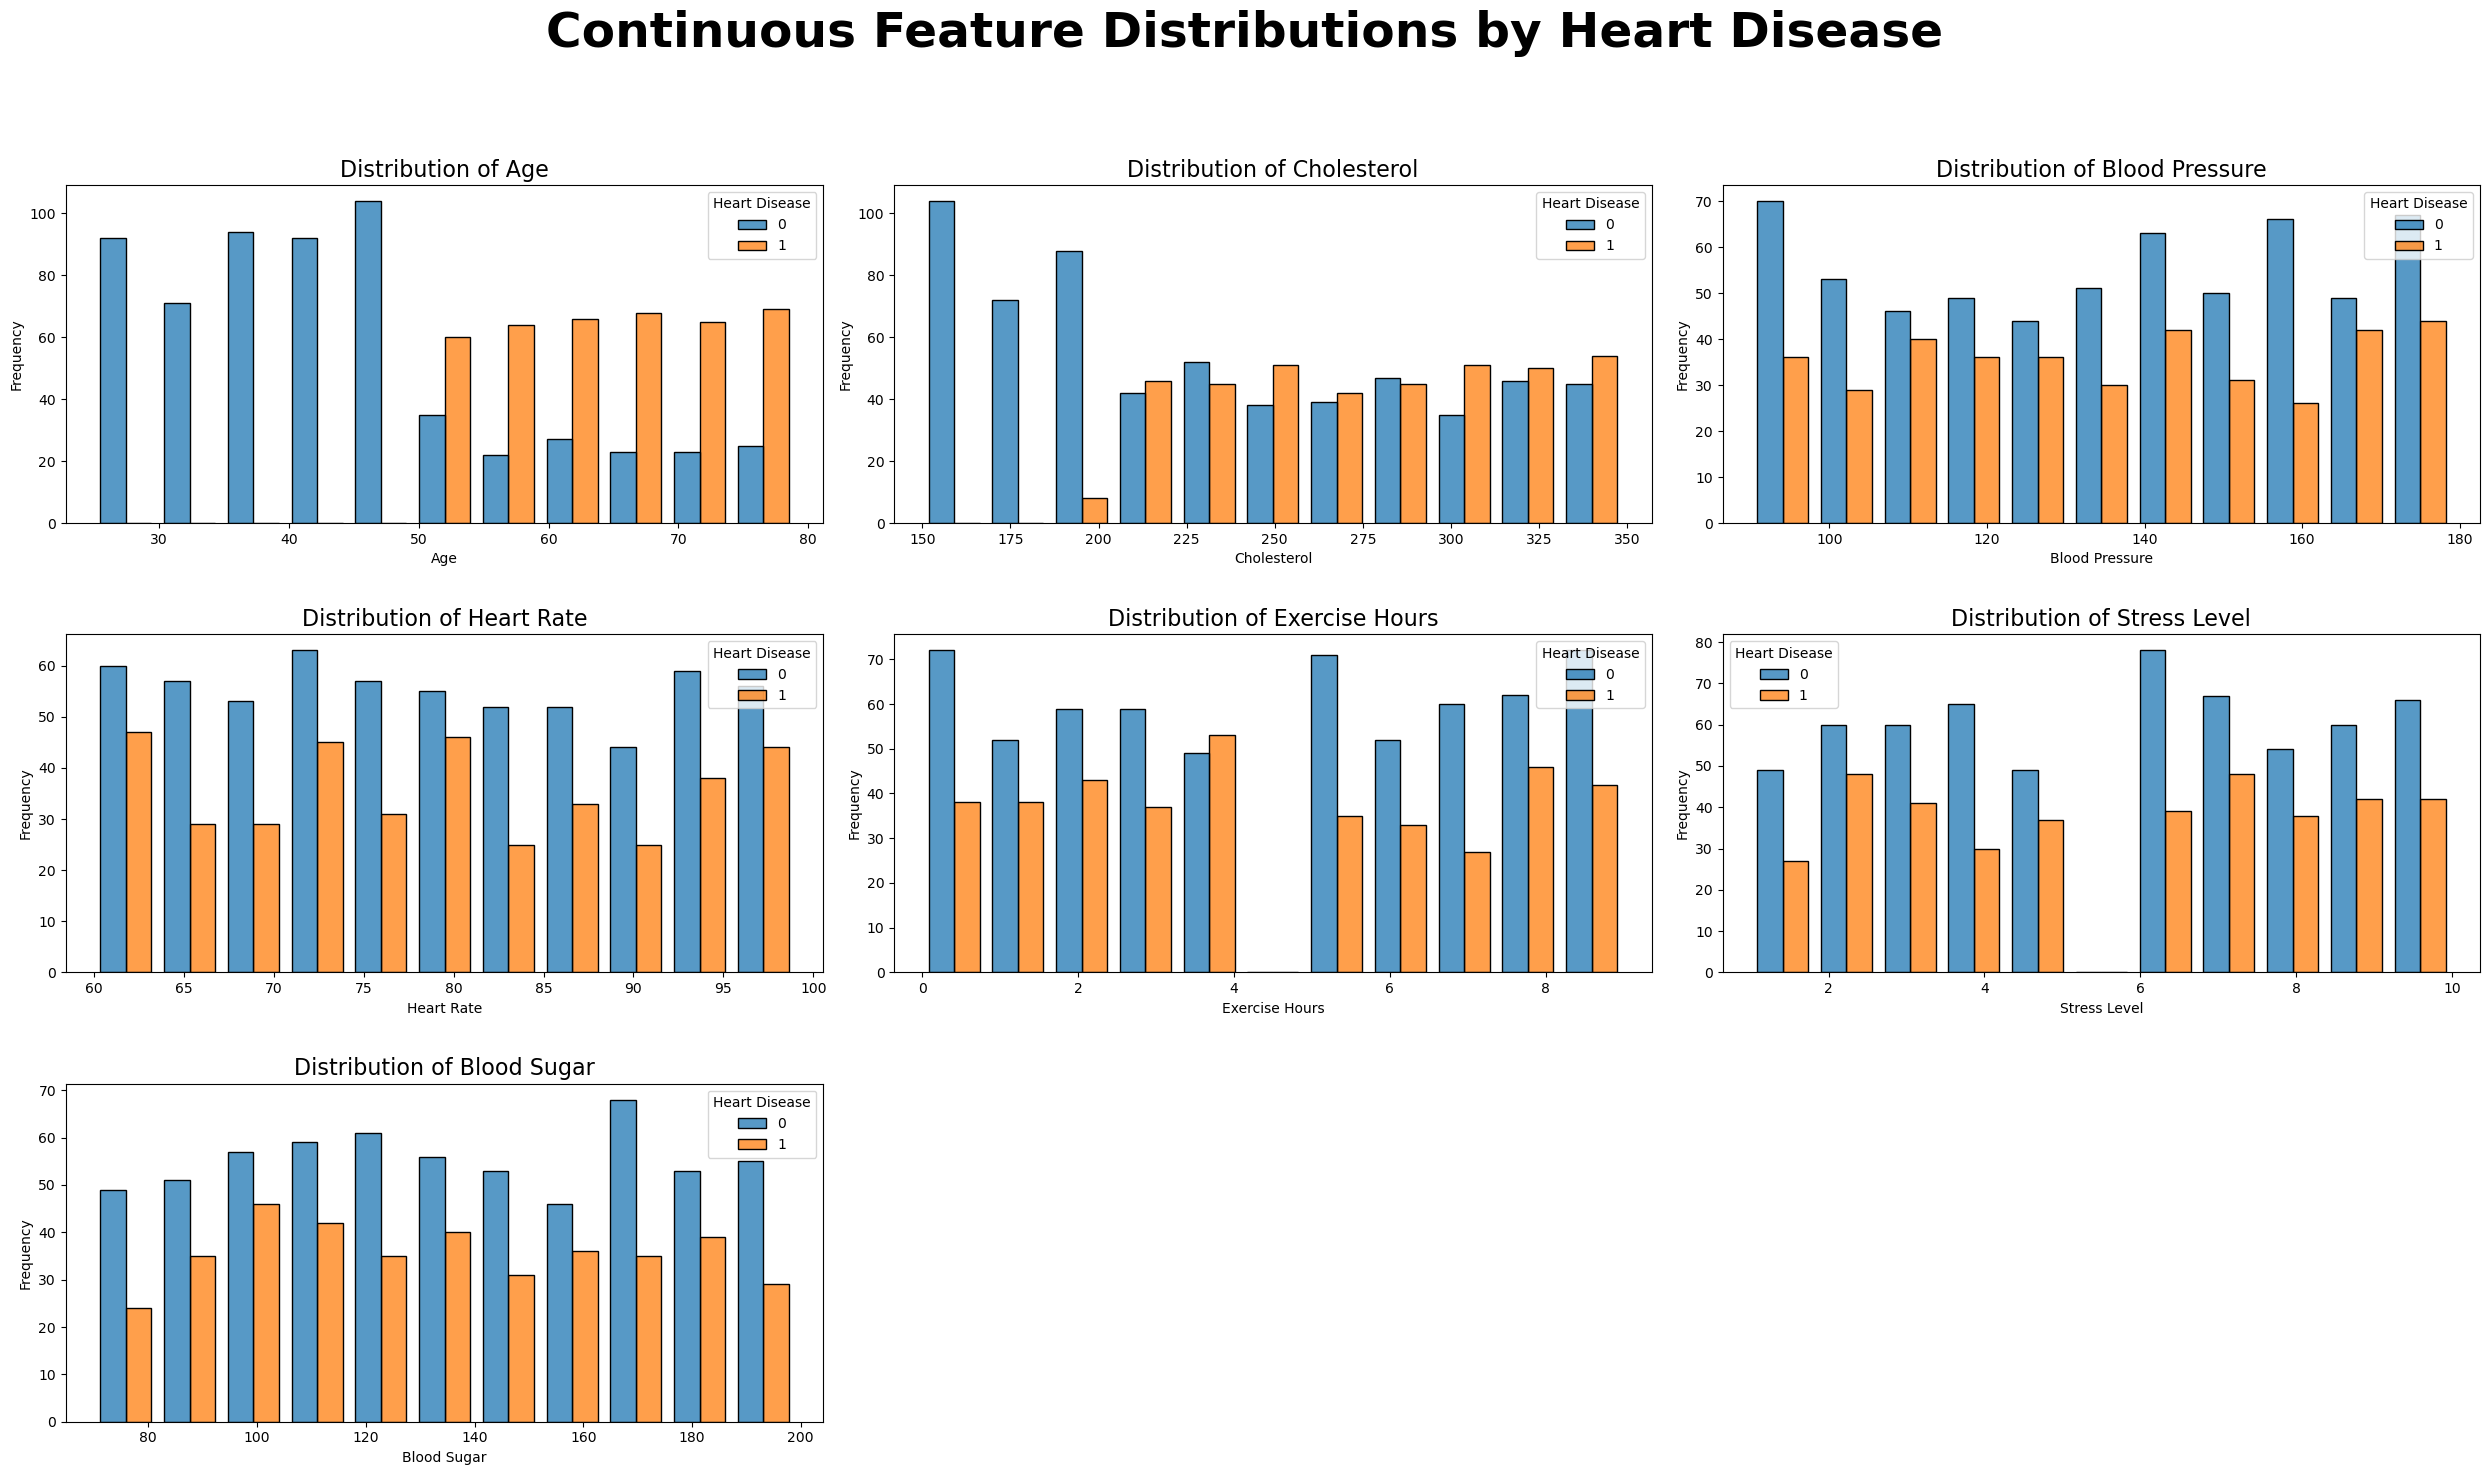

In [16]:
continuous_cols = [
    'Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
    'Exercise Hours', 'Stress Level', 'Blood Sugar'
]

plt.figure(figsize=(25, 15))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3,3, i)
    sns.histplot(data=updated_df, x=col, hue='Heart Disease', multiple="dodge",shrink=0.8)
    plt.title(f'\nDistribution of {col}',fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle("Continuous Feature Distributions by Heart Disease", fontsize=35, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

1. **Cholesteral and Age** are maybe stronger predictors and/or have more of a more direct influence on heart disease presence, due to their clear dominance in specific constraints


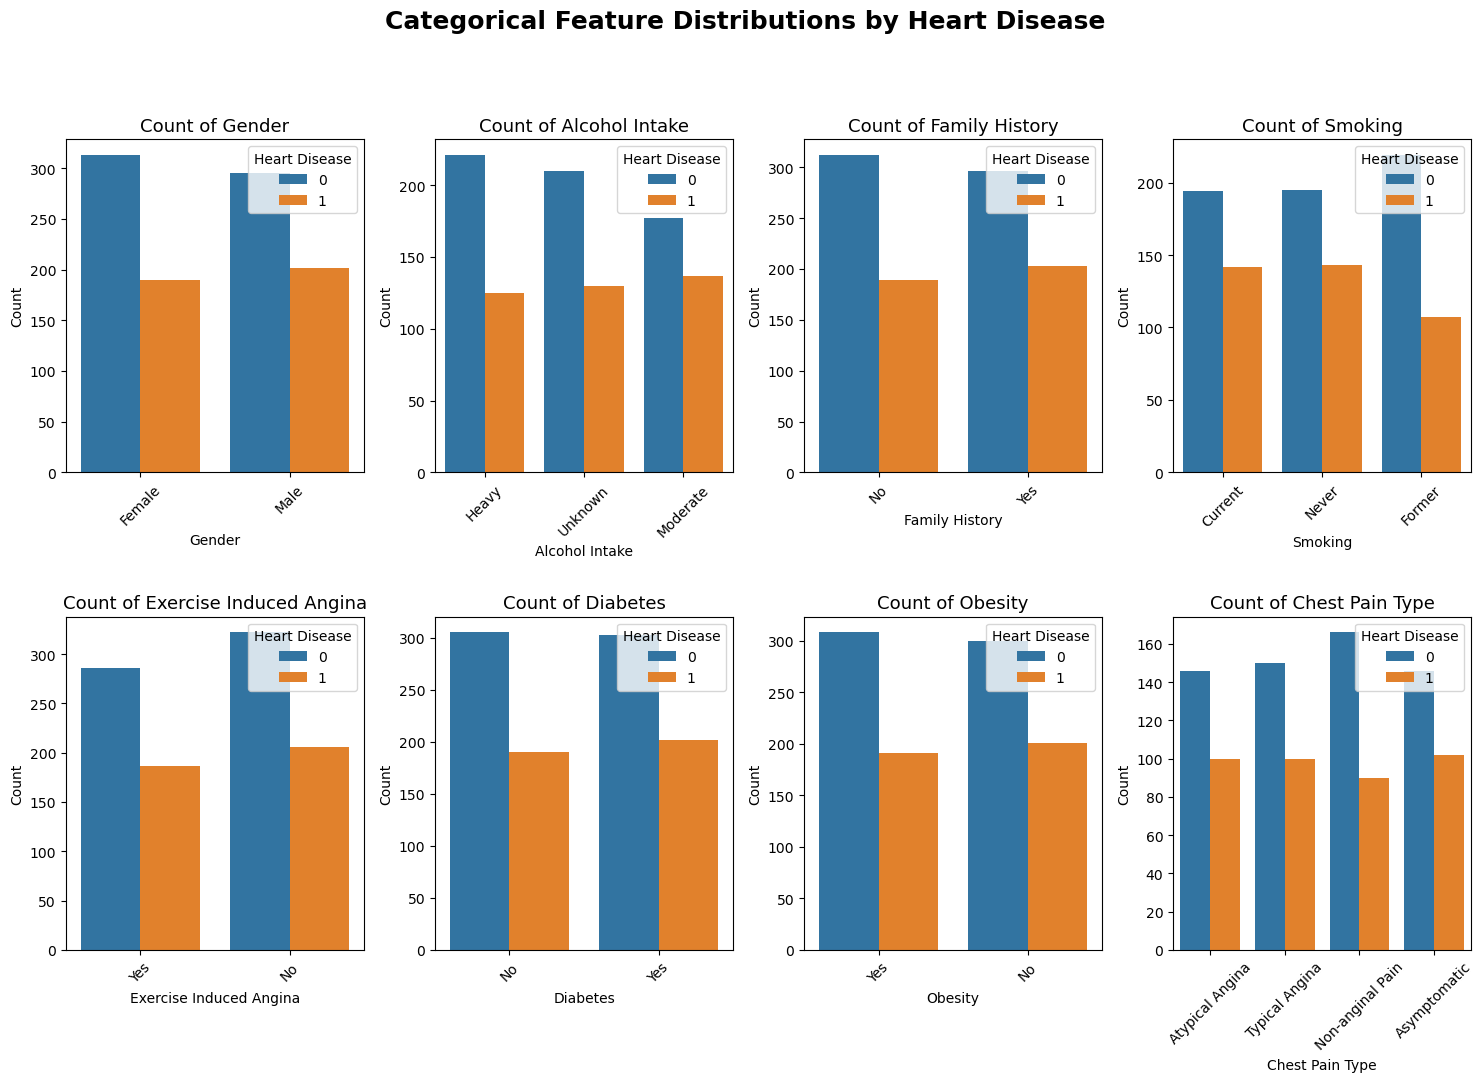

In [17]:
categorical_cols = [
    'Gender', 'Alcohol Intake', 'Family History', 'Smoking',
    'Exercise Induced Angina', 'Diabetes', 'Obesity', 'Chest Pain Type'
]

plt.figure(figsize=(15, 11))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=updated_df, x=col, hue='Heart Disease')
    plt.title(f'\nCount of {col}',fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.suptitle("Categorical Feature Distributions by Heart Disease", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

1. Gender (Males having a higher probability) and Diabetes both exhibit noticeable positive correlation with Heart Disease -> (1)

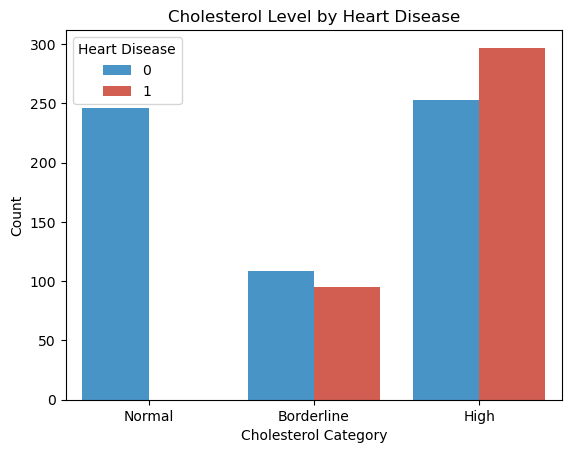

In [18]:
updated_df['Cholesterol_Bin'] = pd.cut(
    updated_df['Cholesterol'],
    bins=[0, 199, 239, 350],
    labels=['Normal', 'Borderline', 'High']
)

sns.countplot(data=updated_df, x='Cholesterol_Bin', hue='Heart Disease', 
              palette={0: '#3498db', 1: '#e74c3c'})
plt.title("Cholesterol Level by Heart Disease")
plt.xlabel("Cholesterol Category")
plt.ylabel("Count")
plt.show()

1. *__Borderline and High Cholesterol__* levels are seen in both groups but patients with heart disease show a **dramatic increase** in high Cholesterol.
2. *__Normal levels__* of Cholesterol are only seen in people without heart disease; implying **potential low risk** of heart disease when cholesterol is normal.  
 `Important to Note: Ranges are noted accordingly to Total Cholesterol, not LDL`.


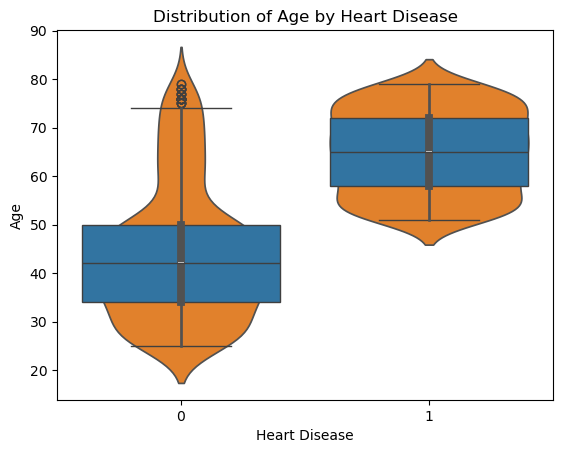

In [19]:

sns.boxplot(data=df, x='Heart Disease', y='Age')
sns.violinplot(data=df, x='Heart Disease', y='Age')
plt.title("Distribution of Age by Heart Disease")
plt.show()

1. People with heart disease tend to be older (**median is higher**).
2. People without heart disease have a wider spread and __*outliers*__ on the upper side (i.e. older people without heart disease).

In [36]:
import joypy
sns.violinplot(data=updated_df, y='Blood Pressure', x='Cholesterol_Bin')
plt.title('Violin Plot')
plt.savefig("violin.png")
plt.close()

joypy.joyplot(
    updated_df,
    by='Cholesterol_Bin',
    column='Blood Pressure',
    figsize=(6, 4),
    fade=True,
    kind="kde",
    colormap=plt.cm.coolwarm
)
plt.title('\nJoy Plot')
plt.xlabel('Blood Pressure')
plt.savefig("joyplot.png",bbox_inches='tight', pad_inches=0.5)
plt.close()

<img src="embedded_plots/violin.png" width="45%"/> <img src="embedded_plots/joyplot.png" width="45%"/>

#### NOTE: Embedded the saved figs using md, not the result of code
1. The widened top section of the Violin Plot and the sharper end peak in **high blood pressure** values in the Joy Plot — consistently indicate that individuals in the high cholesterol category tend to have higher blood pressure.

**_Shows Domain Consistency_**: This alignment with established medical evidence supports the face validity of the dataset

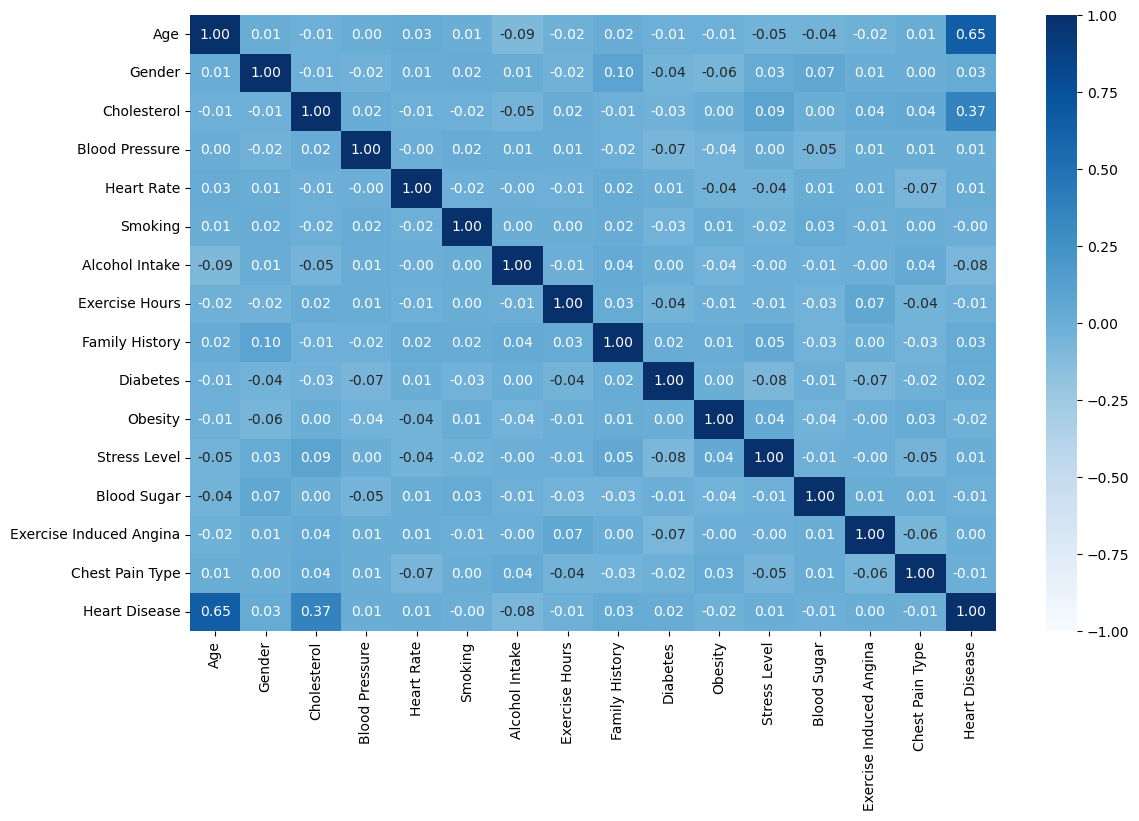

In [24]:
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})
df_encoded['Smoking'] = df_encoded['Smoking'].map({'Never': 0, 'Former': 1, 'Current': 2})
df_encoded['Alcohol Intake'] = df_encoded['Alcohol Intake'].map({'Unknown': 0, 'Moderate': 1, 'Heavy': 2})
df_encoded['Family History'] = df_encoded['Family History'].map({'No': 0, 'Yes': 1})
df_encoded['Diabetes'] = df_encoded['Diabetes'].map({'No': 0, 'Yes': 1})
df_encoded['Obesity'] = df_encoded['Obesity'].map({'No': 0, 'Yes': 1})
df_encoded['Exercise Induced Angina'] = df_encoded['Exercise Induced Angina'].map({'No': 0, 'Yes': 1})
df_encoded['Chest Pain Type'] = df_encoded['Chest Pain Type'].map({'Typical Angina': 0, 'Atypical Angina': 1, 'Non-anginal Pain': 2, 'Asymptomatic': 3})

plt.figure(figsize=(13, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f',vmin=-1, vmax=1,cmap='Blues')
plt.show()

### NOTES  

| Value         | Meaning                         |
| ------------- |:-------------------------------:|
| +1            | Perfect positive correlation    |
|  0            | No correlation                  |
| -1            | Perfect negative correlation    |

1. Shows moderately high positive correlation with **Ages and Cholesterol** (as proven above)
2. The next higher positive correlation is with **Cholesterol and Stress Level** at 0.09

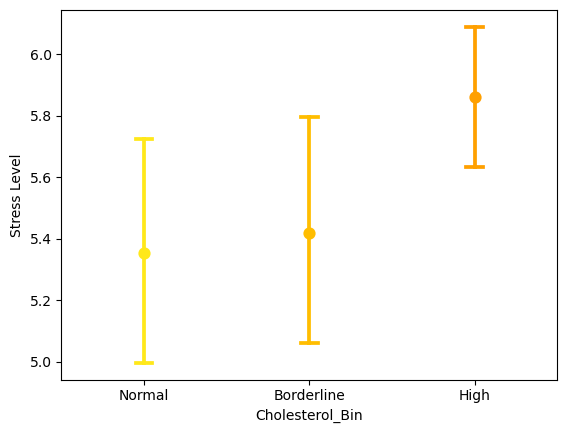

In [32]:
sns.pointplot(data=updated_df, x='Cholesterol_Bin', y='Stress Level', capsize=-0.1, palette='Wistia',hue='Cholesterol_Bin')
#sns.stripplot(data=df, x='Cholesterol_Bin', y='Stress Level', jitter=True, alpha=0.5)
plt.show()

1. A noticeable upward trend in mean **stress** levels across increasing **cholesterol** levels  
**NOTE**: The error bars indicate the spread of stress levels within each group. While some overlap exists, the mean differences remain visually distinguishable and CI being broad can be due to smaller sample size/higher variability

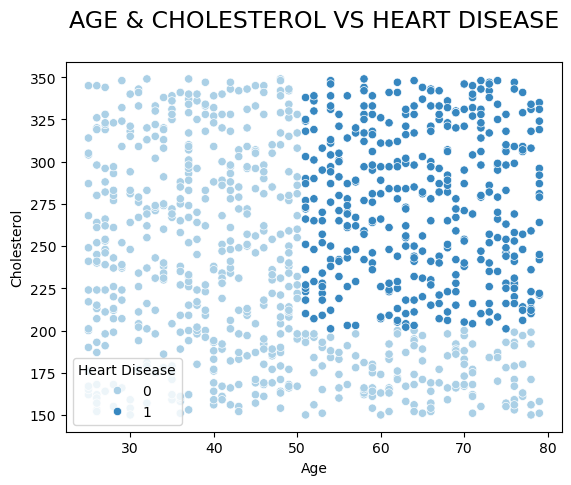

In [33]:
sns.scatterplot(data=updated_df, x='Age', y='Cholesterol', hue='Heart Disease', palette='Blues')
plt.title("AGE & CHOLESTEROL VS HEART DISEASE\n", fontsize=17)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()